# **Visualización para análisis exporatorio**
# AE10. Seaborn Joinplot, Pairplot, Lmplot y Displot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

In [ ]:
sns.set(context='notebook', style='darkgrid', palette='dark')

En este caso, ahora en adelante todos los gráficos que utilicemos van a tener el formato que nosotros definimos con el método `sns.set()`

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
penguins_df = pd.read_csv("/content/drive/MyDrive/VD02.csv").dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


##<font color='blue'>__Gráficas avanzadas en Seaborn__</font>



### <font color='blue'>__jointplot__</font>
Hasta ahora hemos visto gráficos que conocíamos desde su implementación en matplotlib. Seaborn, tiene implementaciones muchos más complejas, encapsulando una gran cantidad de operaciones y permitiendo la gráfica con información univariada y bivariada de forma relativamente sencilla. Para esto podemos utilizar el método `sns.jointplot`, donde por defecto, nos generara un diagrama de dispersión para un par de variables e histogramas para cada una de las variables involucradas. Existen también múltiples tipos de gráficos que se pueden utilizar para la zona bivariada, la cual se puede encontrar en la documentación:

[Documentación jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot)


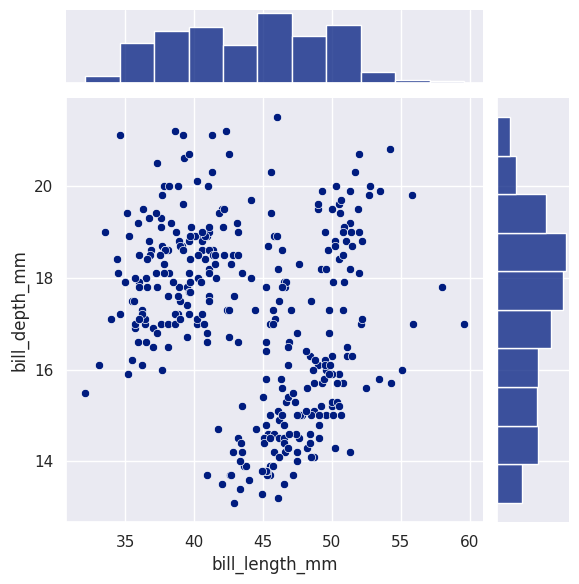

In [ ]:
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=penguins_df)
plt.show()

Cabe destacar que si utilizamos el parámetro `hue`, los histogramas cambiaran hacia diagramas KDE:

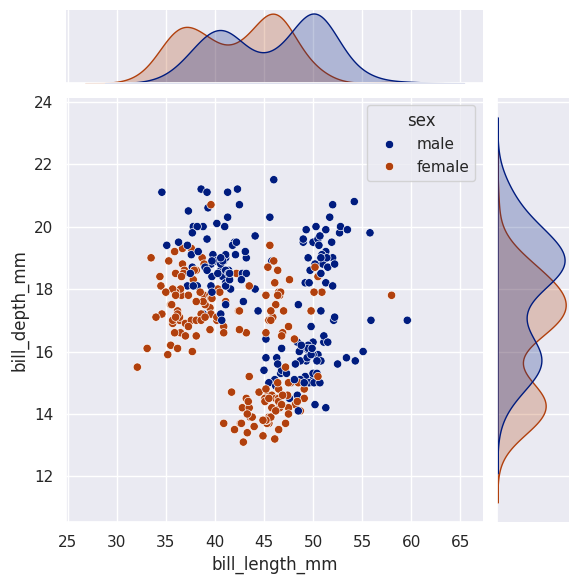

In [ ]:
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=penguins_df, hue='sex')
plt.show()

### <font color='blue'>__pairplot__</font>
Anteriormente en las clases de matplotlib, veíamos que, si queríamos hacer diagramas de dispersión para todas las variables numéricas del set de datos, tendríamos que instanciar los subplots e ir graficando uno a uno las interacciones para cada par de variables. Seaborn por su parte, traer el método `sns.pairplot` el cual realizara una matriz de gráficos de bivariados (por defecto, diagramas de dispersión). En la diagonal por defecto se muestran histogramas, pero estos se pueden cambiar, de la misma forma que los gráficos bivariados. La mayoría de las posibilidades de gráficos bivariados son las mismas que los que existen en jointplot. Para ver todas las posibilidades, ver la documentación:

[Documentación pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot)


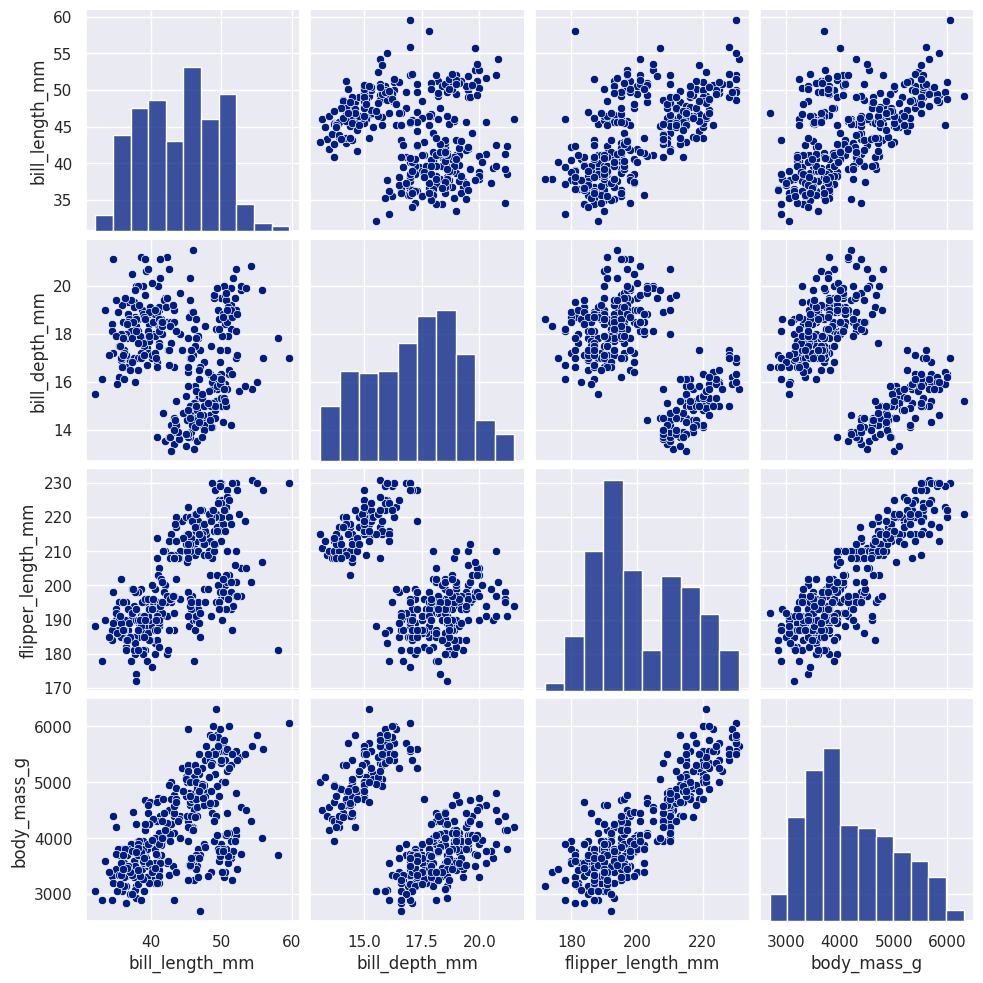

In [ ]:
sns.pairplot(data=penguins_df) # Este método como minimo solo necesita el parámetro data
plt.show()

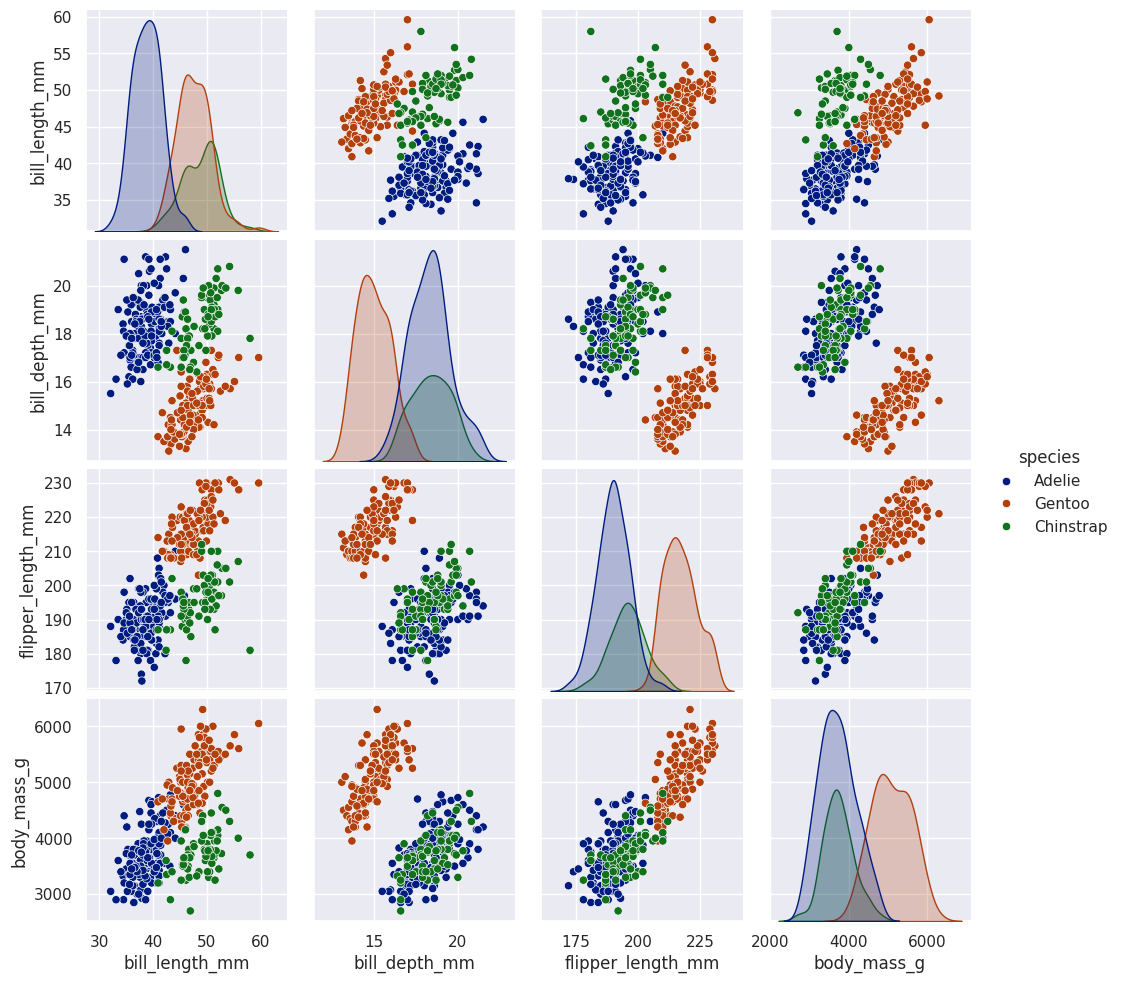

In [ ]:
# Si agregamos el parámetro hue, la diagonal cambia de histograma a KDE
sns.pairplot(data=penguins_df, hue='species')
plt.show()

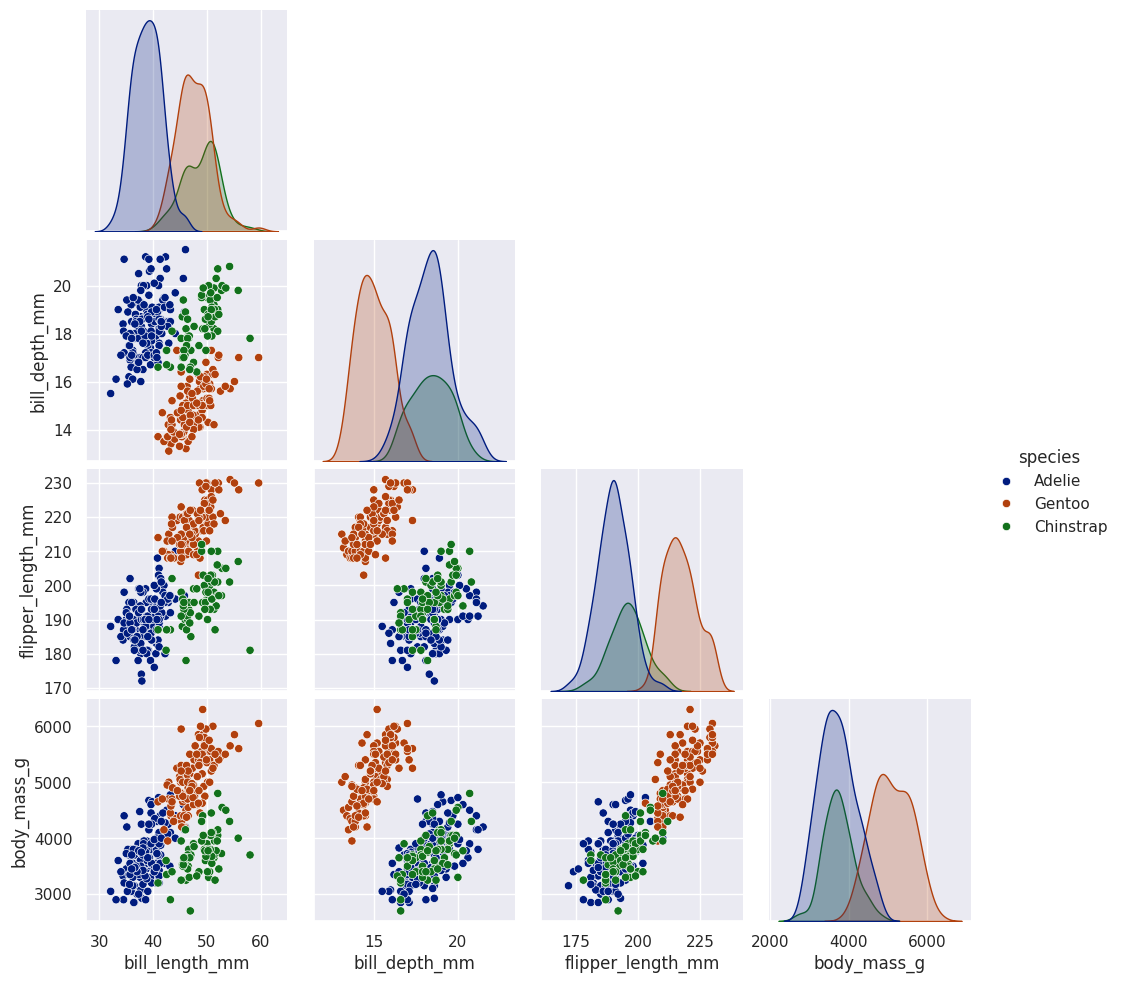

In [ ]:
# Y si ocupamos el parámetro corner, solo vamos a mostrar desde la diagonal, hacia abajo.
sns.pairplot(penguins_df, corner=True, hue='species')
plt.show()

### <font color='blue'>__regplot__</font>
Además de todos estos gráficos, Seaborn presenta un método para poder graficar un diagrama de dispersión, en conjunto con la regresión lineal simple. Para hacer este gráfico, necesitamos llamar al método `sns.regplot()`, sin embargo, este método no es capaz de separar por alguna columna en específico (por ej, utilizando el parámetro `hue`):

[Documentación Regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot)


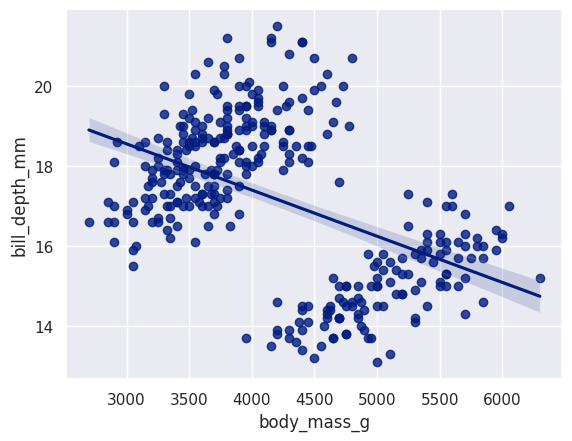

In [ ]:
# Regresion lineal simple entre body_mass_g y bill_depth_mm
sns.regplot(x='body_mass_g', y='bill_depth_mm', data=penguins_df)
plt.show()

### <font color='blue'>__lmplot__</font>
Un método más completo y que permite mayor personalización de los gráficos generados corresponde a `sns.lmplot`. Este método nos permite modelar múltiples relaciones lineales existentes en nuestros datos. En este caso, podemos utilizar los parámetros `hue` para separar por una columna, pero adicionalmente podemos utilizar el parámetro `col` para generar subgráficos dependiendo de los valores existentes en la columna seleccionada.

[Documentación lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot)


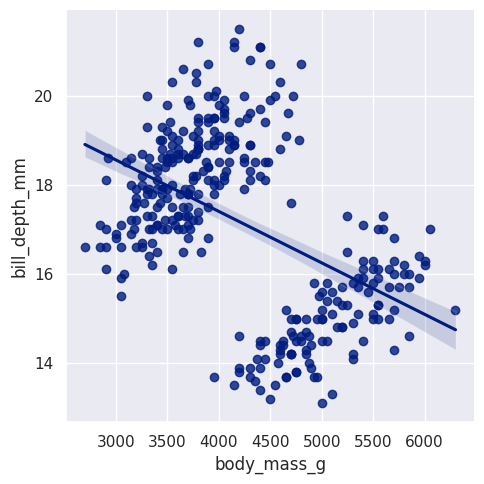

In [ ]:
# Generamos un gráfico similar a regplot
sns.lmplot(x='body_mass_g', y='bill_depth_mm', data=penguins_df)
plt.show()

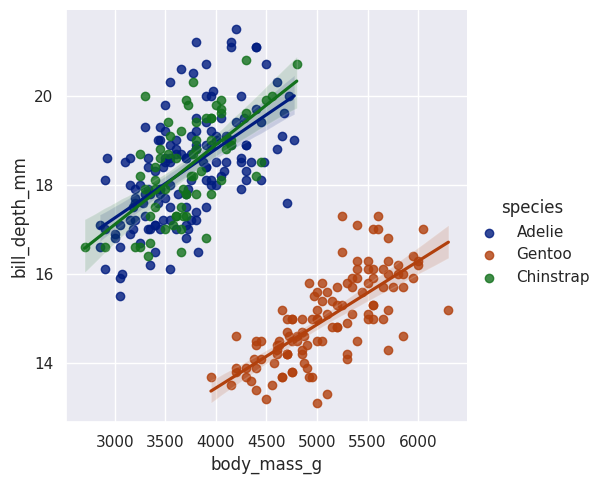

In [ ]:
# Pero ahora, podemos ajustar una regresión para cada una de las especies (dado el parámetro hue)
sns.lmplot(x='body_mass_g', y = 'bill_depth_mm',data=penguins_df, hue="species",)
plt.show()

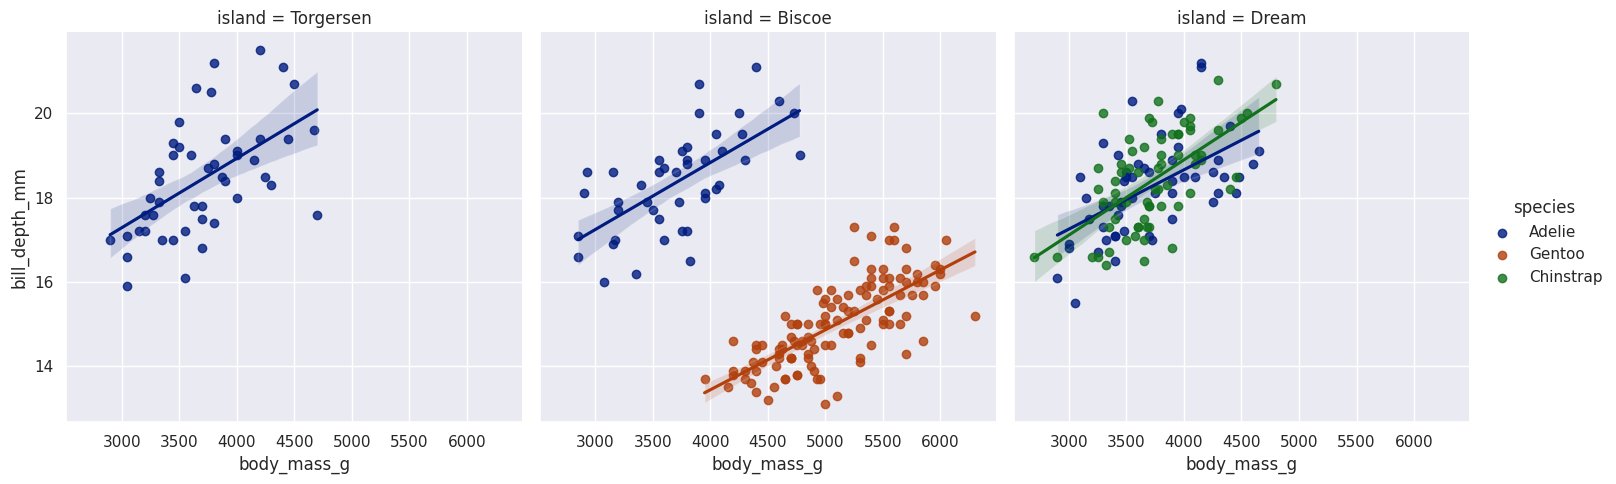

In [ ]:
# E inclusive, podemos generar subgráficos con el paràmetro col
# en este caso, estamos separando por isla y ajustando una regresión por especie
sns.lmplot(x='body_mass_g', y = 'bill_depth_mm', data=penguins_df, hue="species", col='island')
plt.show()

### <font color='blue'>__displot__</font>

Finalmente, tenemos el método `sns.displot` que nos permite de igual manera que `sns.lmplot`, generar gráficos y subgráficos con múltiples niveles de separación dependiendo de las columnas que nosotros queramos consultar de nuestro set de datos. En este caso, `sns.displot` está especializado para graficar distribuciones univariadas y bivariadas.

[Documentación distplot](https://seaborn.pydata.org/generated/seaborn.displot.html?highlight=displot#seaborn.displot)


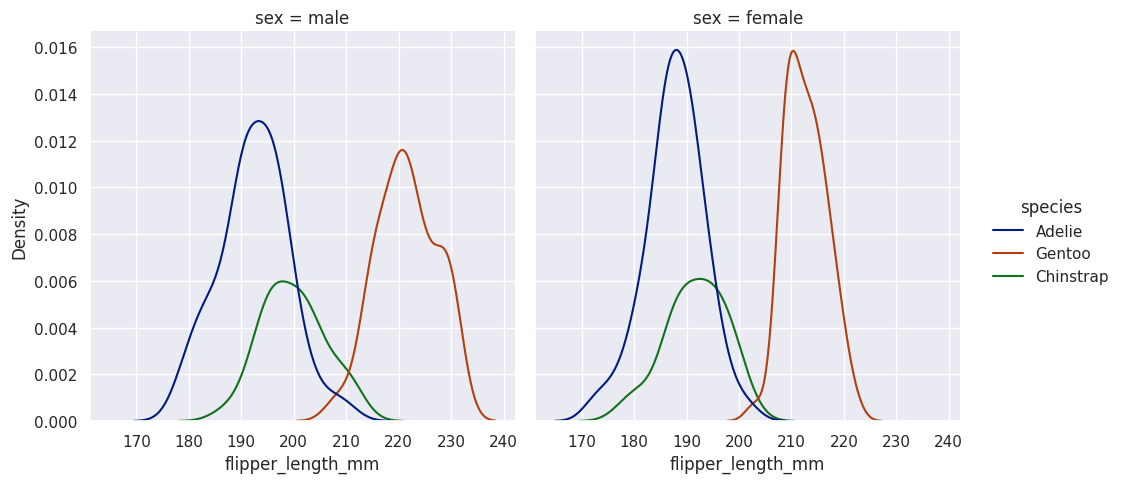

In [ ]:
# En este caso, se va a ver la distribución univariada, utilizando KDE,
# separados por especies y sexo de los pingüinos
sns.displot(data=penguins_df, x="flipper_length_mm", hue="species", col="sex", kind="kde")
plt.show()

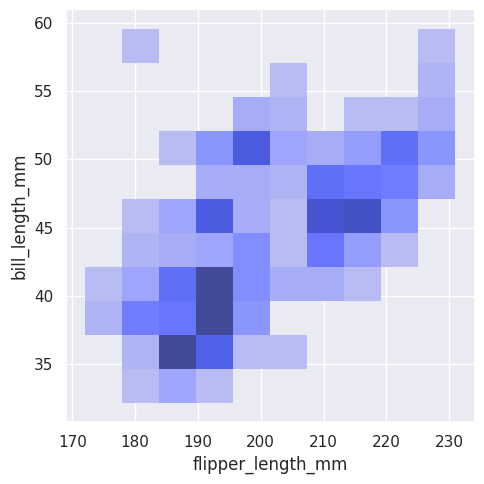

In [ ]:
# O en su defecto, un histograma bivariado utilizando el mismo método displot
sns.displot(data=penguins_df, x="flipper_length_mm", y="bill_length_mm")
plt.show()

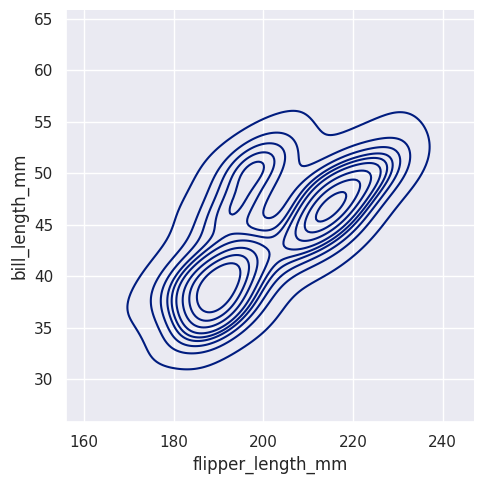

In [ ]:
# Alternativamente tenemos los diagramas de KDE bivariados, donde modela de forma similar (pero con superficies)
# la distribución bivariada de dos columnas de nuestro set de datos
sns.displot(x="flipper_length_mm", y="bill_length_mm", kind="kde", data=penguins_df)
plt.show()

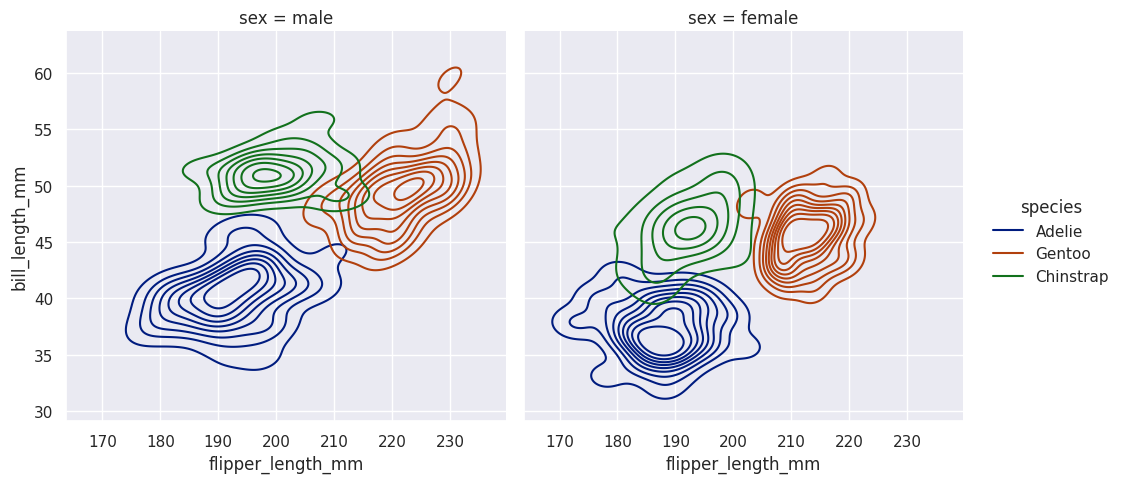

In [ ]:
# Y este ultimo gráfico, podemos hacer la misma separación por especies y subgraficos por columna sexo de los pinguinos
sns.displot(x="flipper_length_mm", y="bill_length_mm", hue='species',kind="kde", col="sex",data=penguins_df)
plt.show()

## <font color='blue'>__Ejercicios__</font>

### <font color='green'>__Actividad 1:__</font>

Para finalizar con las dinámicas se van a implementar los gráficos avanzados para los dos sets de datos que hemos estado trabajando  clima y precio de casas (VD04.csv y VD08.csv). En este caso, se pide que se utilice como color algunas de las variables categóricas de los sets de datos (siempre y cuando, el método de graficar lo permita).

Para **cada set de datos**:

- 1 jointplot
- 1 pairplot
- 1 regplot
- 1 lmplot
- 1 displot


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuración de estilo de Seaborn
sns.set(context='notebook', style='darkgrid', palette='dark')


In [6]:
# Tu código aquí ...

weather_df = pd.read_csv("/content/drive/MyDrive/VD04.csv")
weather_df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


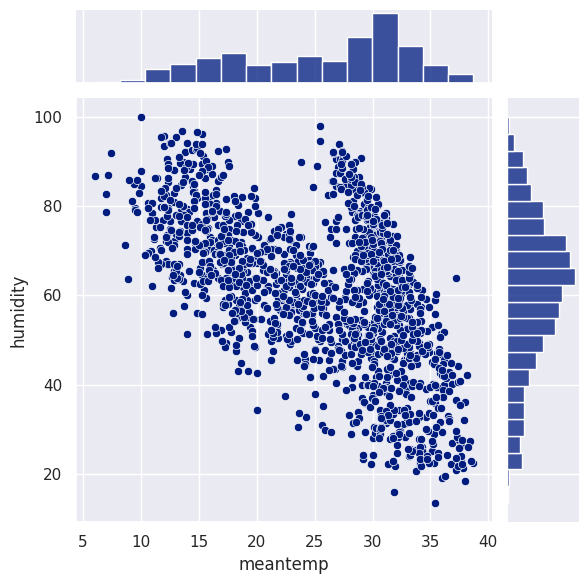

In [7]:
#joinplot
sns.jointplot(x='meantemp', y='humidity', data=weather_df)
plt.show()

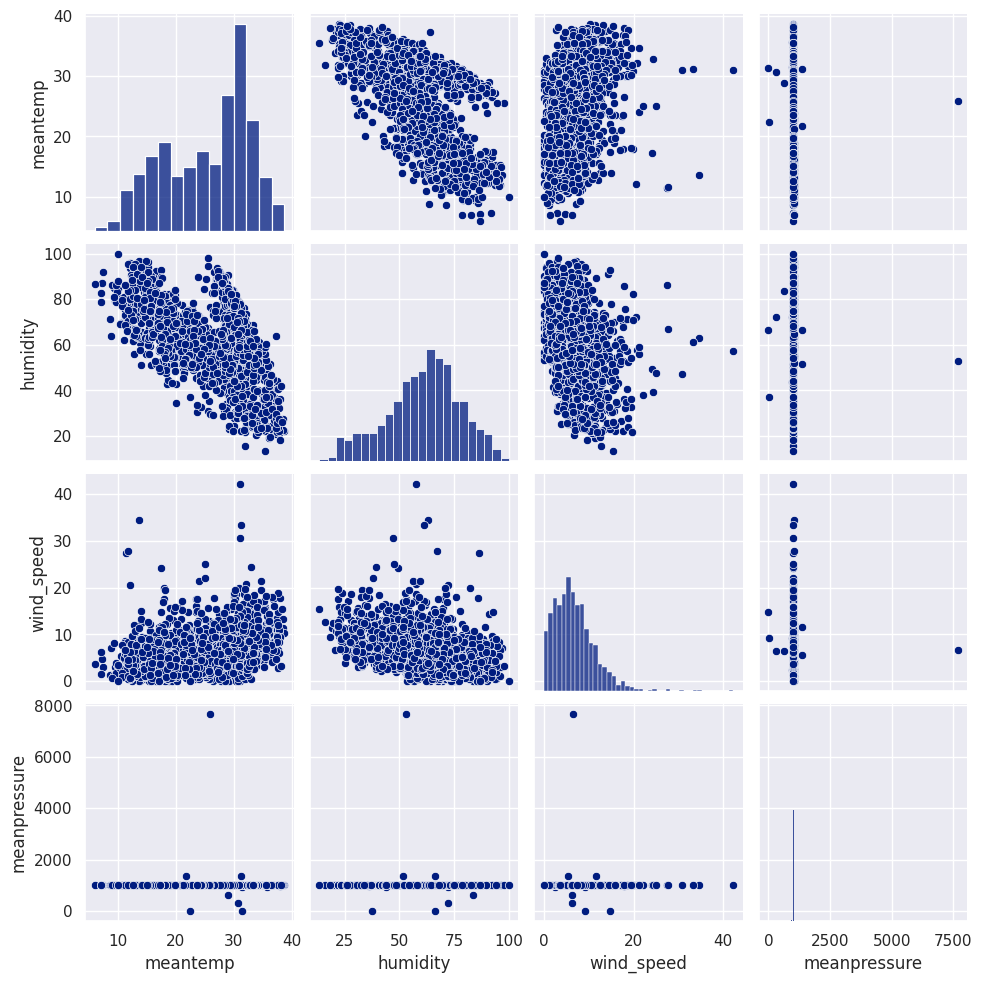

In [8]:
#pairplot
sns.pairplot(data=weather_df)
plt.show()

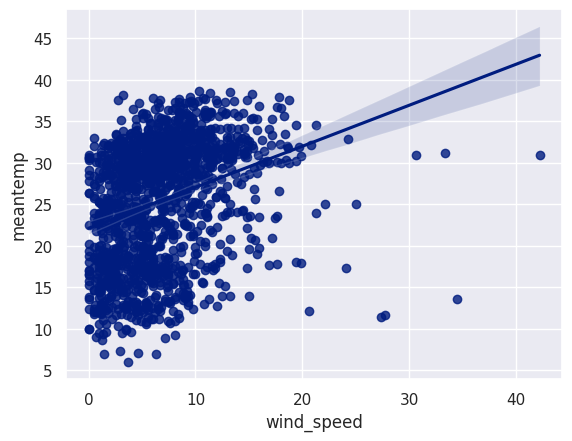

In [9]:
#regplot
sns.regplot(x='wind_speed', y='meantemp', data=weather_df)
plt.show()

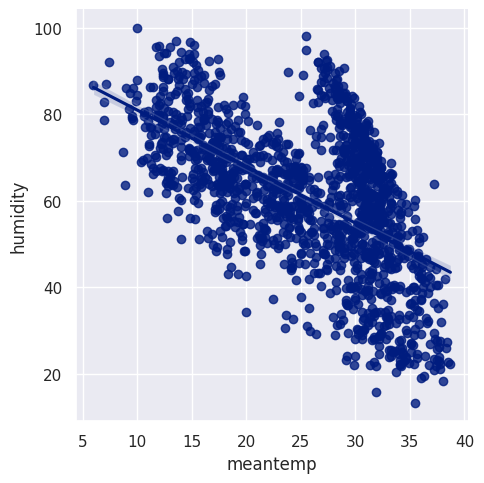

In [10]:
#lmplot
sns.lmplot(x='meantemp', y='humidity', data=weather_df)  # Suponiendo que exista una variable 'season'
plt.show()

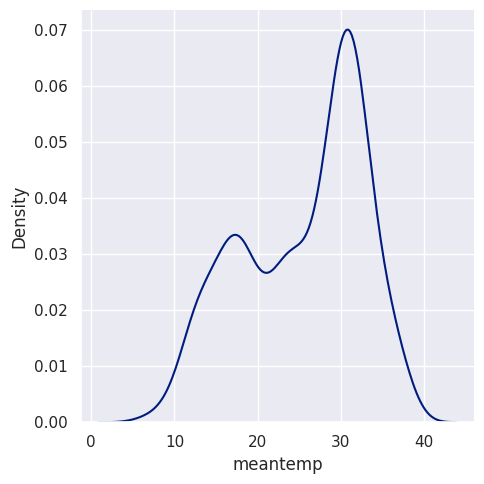

In [11]:
#displot
sns.displot(data=weather_df, x='meantemp', kind='kde')
plt.show()

In [12]:
house_df = pd.read_csv("/content/drive/MyDrive/VD08.csv")
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


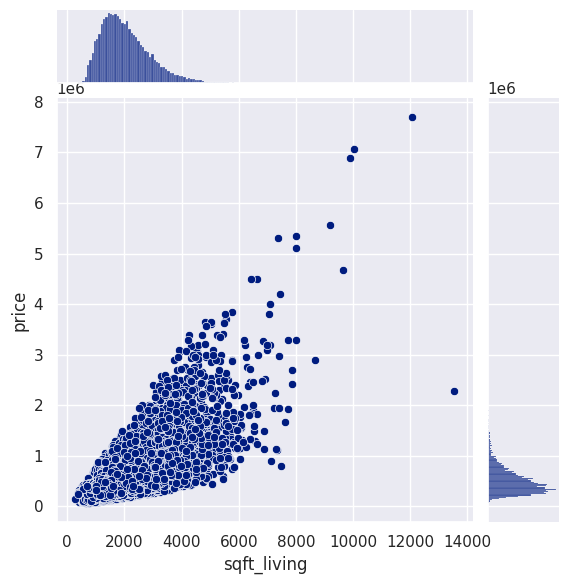

In [13]:
#joinplot
sns.jointplot(x='sqft_living', y='price', data=house_df)
plt.show()

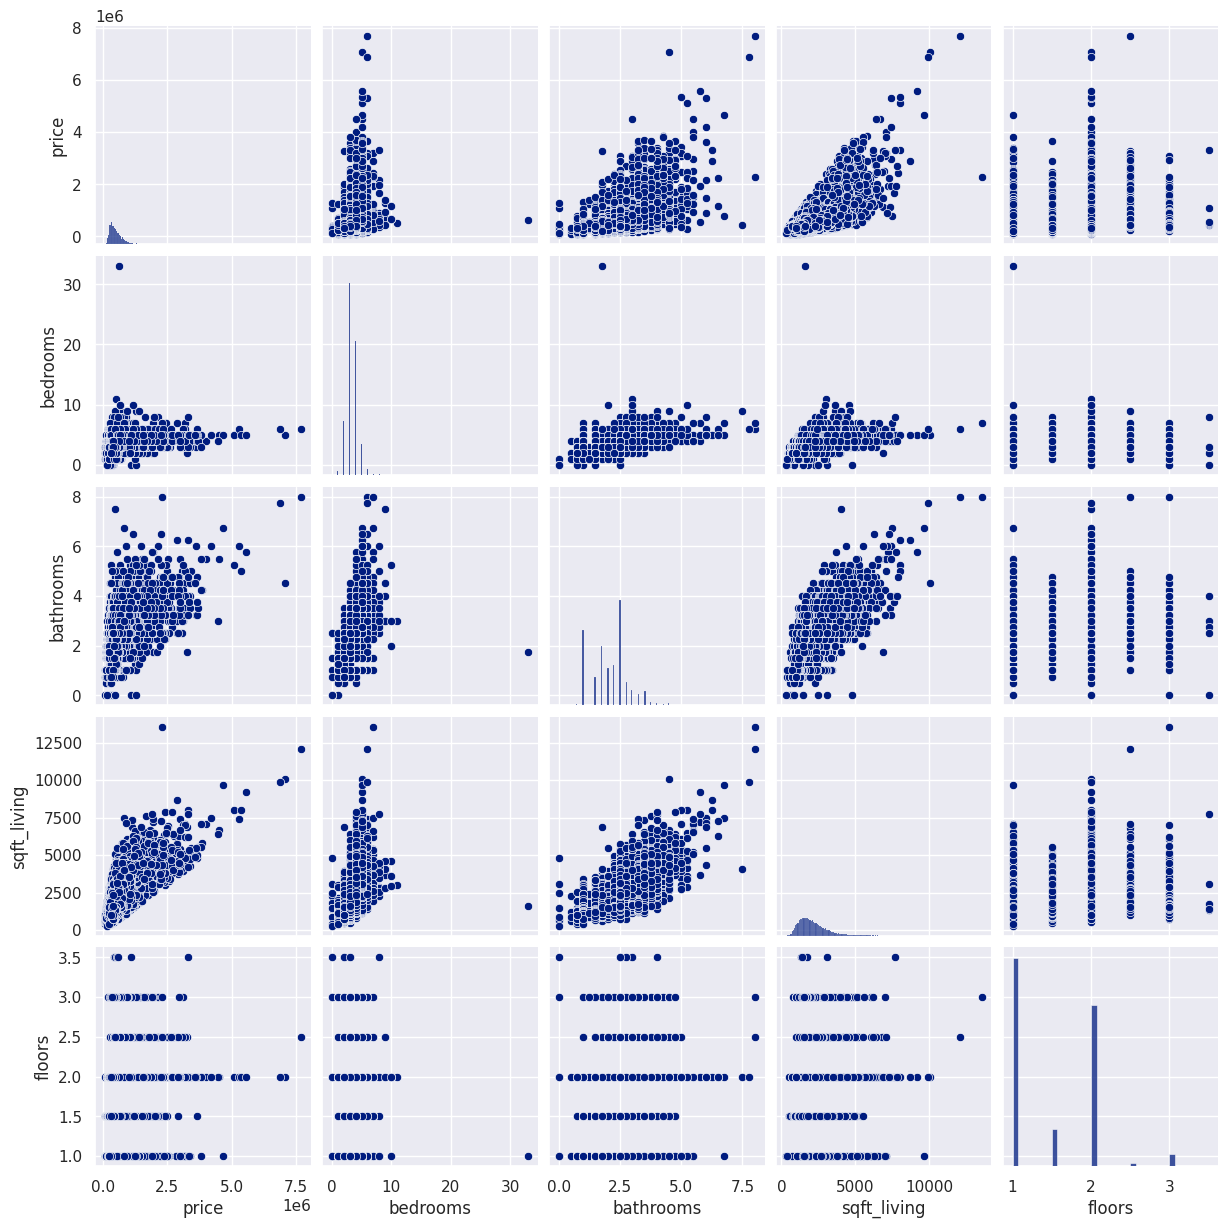

In [14]:
#pairplot
sns.pairplot(data=house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors']])
plt.show()

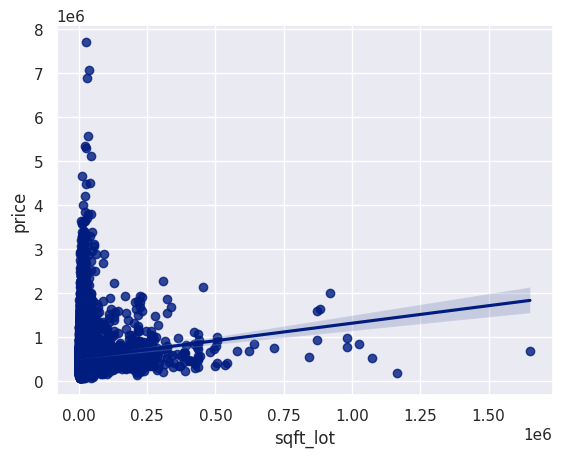

In [15]:
#regplot
sns.regplot(x='sqft_lot', y='price', data=house_df)
plt.show()

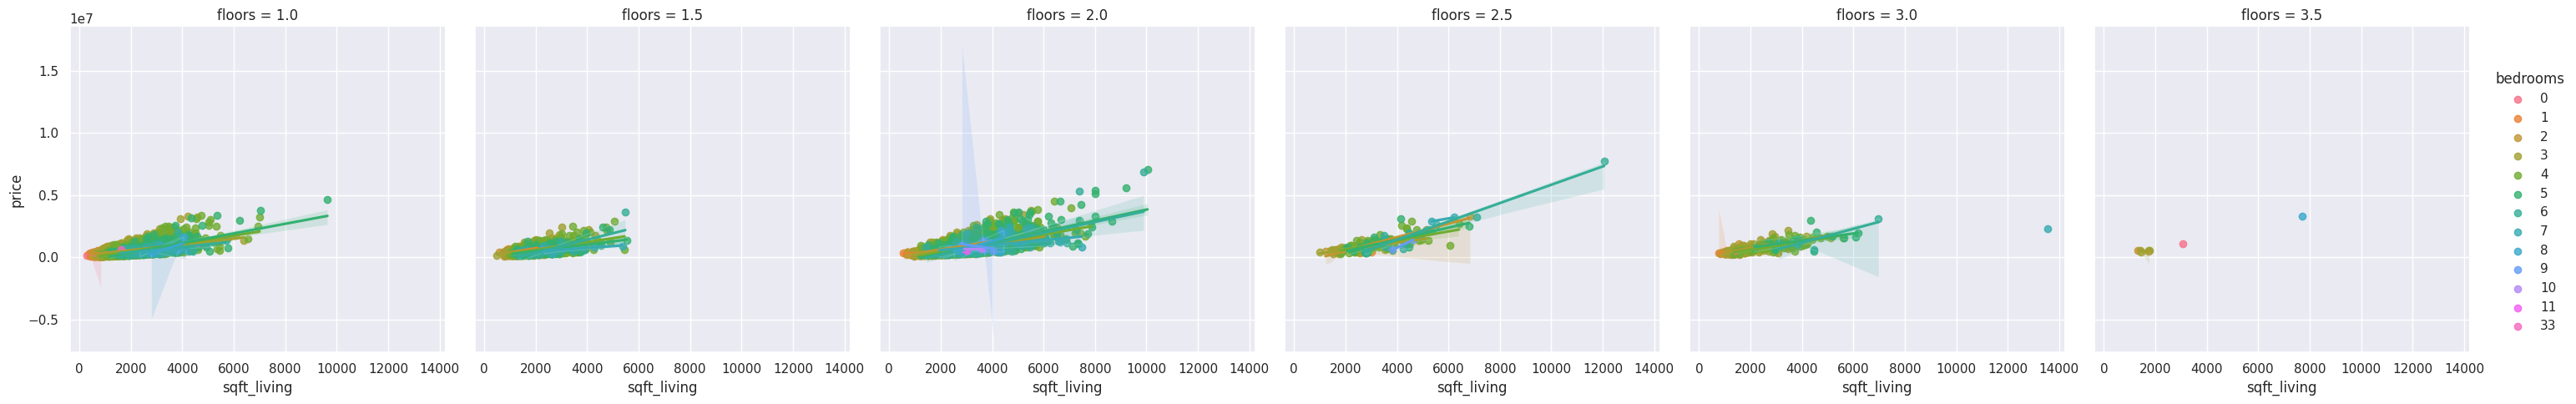

In [16]:
#lmplot
sns.lmplot(x='sqft_living', y='price', data=house_df, hue='bedrooms', col='floors')
plt.show()

<ipython-input-17-90783fea92f9>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=house_df, x='price', hue='bedrooms', kind='kde')


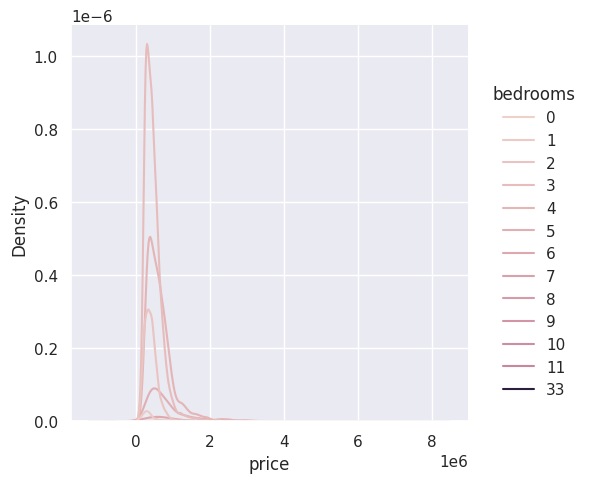

In [17]:
#displot
sns.displot(data=house_df, x='price', hue='bedrooms', kind='kde')
plt.show()

<font color='green'>Fin actividad 1</font>

<img src="https://drive.google.com/uc?export=view&id=1DNuGbS1i-9it4Nyr3ZMncQz9cRhs2eJr" width="100" align="left" title="Runa-perth">
<br clear="left">

## <font color='blue'>**Resumen**</font>

### __Funcionalidades de Seaborn__

Seaborn es una biblioteca de visualización de datos en Python basada en Matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos. Sus principales atributos son:

- __Interfaz de Alto Nivel__ Seaborn proporciona una interfaz de alto nivel para crear una variedad de gráficos estadísticos. Esto significa que con comandos simples, puedes crear gráficos complejos y estilizados.
```python
import seaborn as sns
sns.set(style="darkgrid")
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips)
```

- __Integración con Pandas__
Seaborn se integra perfectamente con estructuras de datos de Pandas, lo que facilita la visualización directa de conjuntos de datos almacenados como DataFrames.
```python
import pandas as pd
data = pd.DataFrame({'x': [1, 2, 3, 4], 'y': [4, 3, 2, 1]})
sns.lineplot(x='x', y='y', data=data)
```

- __Estilos y Paletas de Colores__ Seaborn permite personalizar fácilmente el estilo de los gráficos (por ejemplo, fondos de gráficos, colores, cuadrículas) y ofrece una amplia variedad de paletas de colores.
```python
sns.set_style("whitegrid")
sns.boxplot(x=tips["total_bill"])
```

- __Gráficos de Distribución__ Seaborn incluye funciones para visualizar distribuciones univariadas y bivariadas de datos (distplot, kdeplot, jointplot, etc.), lo que es útil para entender la distribución de una variable o la relación entre dos variables.
```python
sns.distplot(tips['total_bill'])
```

- __Gráficos Categóricos__ Seaborn facilita la creación de gráficos que muestran la relación entre una variable numérica y una categórica (boxplot, violinplot, swarmplot, barplot, etc.).
```python
sns.barplot(x='day', y='total_bill', data=tips)
```

- __Gráficos de Matriz__ Seaborn incluye funciones para visualizar relaciones entre múltiples variables a través de matrices de gráficos, como pairplot (para visualizar relaciones por pares entre múltiples variables numéricas) y heatmap (para visualizar datos de matriz como una cuadrícula codificada por colores).
```python
sns.pairplot(tips)
```

- __Gráficos de Regresión__ Seaborn hace que sea sencillo visualizar modelos de regresión lineal en los datos con funciones como regplot y lmplot.
```python
sns.regplot(x="total_bill", y="tip", data=tips)
```

- __Facetado__ La clase FacetGrid de Seaborn permite crear gráficos que representan subconjuntos de datos a través de múltiples paneles, permitiendo comparar fácilmente estas subpoblaciones.
```python
g = sns.FacetGrid(tips, col="time")
g.map(sns.scatterplot, "total_bill", "tip")
```

- __Funciones de Comparación de Conjuntos de Datos__ Seaborn incluye funciones como relplot y catplot, que son interfaces de alto nivel para crear una variedad de tipos de gráficos y son muy útiles para comparar conjuntos de datos.
```python
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)
```

- __Configuración de Estética Global__ Con funciones como set(), puedes cambiar fácilmente muchos aspectos estéticos de tus gráficos de manera global para mantener la coherencia en todas tus visualizaciones.
```python
sns.set(style="white", context="talk")
sns.boxplot(x=tips["total_bill"])
```

- __Integración con Matplotlib__
Aunque Seaborn simplifica muchas tareas de visualización, también puedes usar Matplotlib para personalizar tus gráficos de manera más detallada si es necesario.
```python
import matplotlib.pyplot as plt
sns.lineplot(x='x', y='y', data=data)
plt.title('Ejemplo de Título')
````

Seaborn es una biblioteca poderosa y flexible que hace que la visualización de datos en Python sea más accesible y atractiva, especialmente para aquellos que trabajan con DataFrames de Pandas. Es especialmente útil para explorar y entender datos a través de visualizaciones claras y efectivas

<img src="https://drive.google.com/uc?export=view&id=1DNuGbS1i-9it4Nyr3ZMncQz9cRhs2eJr" width="50" align="left" title="Runa-perth">
<br clear="left">